# Minimal example

See https://github.com/empymod/emg3d-examples/blob/master/0a_Minimum_working_example.ipynb

In [1]:
import emg3d
import discretize
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300

In [3]:
grid = discretize.TensorMesh(
        [[(25, 48)], [(50, 32)], [(30, 32)]],
        x0='CCC')
grid

TensorMesh: 49,152 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     48       -600.00        600.00     25.00     25.00    1.00
   y     32       -800.00        800.00     50.00     50.00    1.00
   z     32       -480.00        480.00     30.00     30.00    1.00

In [4]:
model = emg3d.utils.Model(
        grid, res_x=1.5, res_y=1.8, res_z=3.3)

sfield = emg3d.utils.get_source_field(
        grid, src=[0, 0, 0, 0, 0], freq=10)

efield = emg3d.solver.solver(
        grid, model, sfield, verb=3)


:: emg3d START :: 10:28:27 :: v0.9.2.dev1

   MG-cycle       : 'F'                 sslsolver : False
   semicoarsening : False [0]           tol       : 1e-06
   linerelaxation : False [0]           maxit     : 50
   nu_{i,1,c,2}   : 0, 2, 1, 2          verb      : 3
   Original grid  :  48 x  32 x  32     => 49,152 cells
   Coarsest grid  :   3 x   2 x   2     => 12 cells
   Coarsest level :   4 ;   4 ;   4   

   [hh:mm:ss]  rel. error                  [abs. error, last/prev]   l s

       h_
      2h_ \                  /
      4h_  \          /\    / 
      8h_   \    /\  /  \  /  
     16h_    \/\/  \/    \/   

   [10:28:27]   2.623e-02  after   1 F-cycles   [1.464e-06, 0.026]   0 0
   [10:28:28]   2.253e-03  after   2 F-cycles   [1.258e-07, 0.086]   0 0
   [10:28:28]   3.051e-04  after   3 F-cycles   [1.704e-08, 0.135]   0 0
   [10:28:29]   5.501e-05  after   4 F-cycles   [3.071e-09, 0.180]   0 0
   [10:28:29]   1.170e-05  after   5 F-cycles   [6.532e-10, 0.213]   0 0
   [10:28

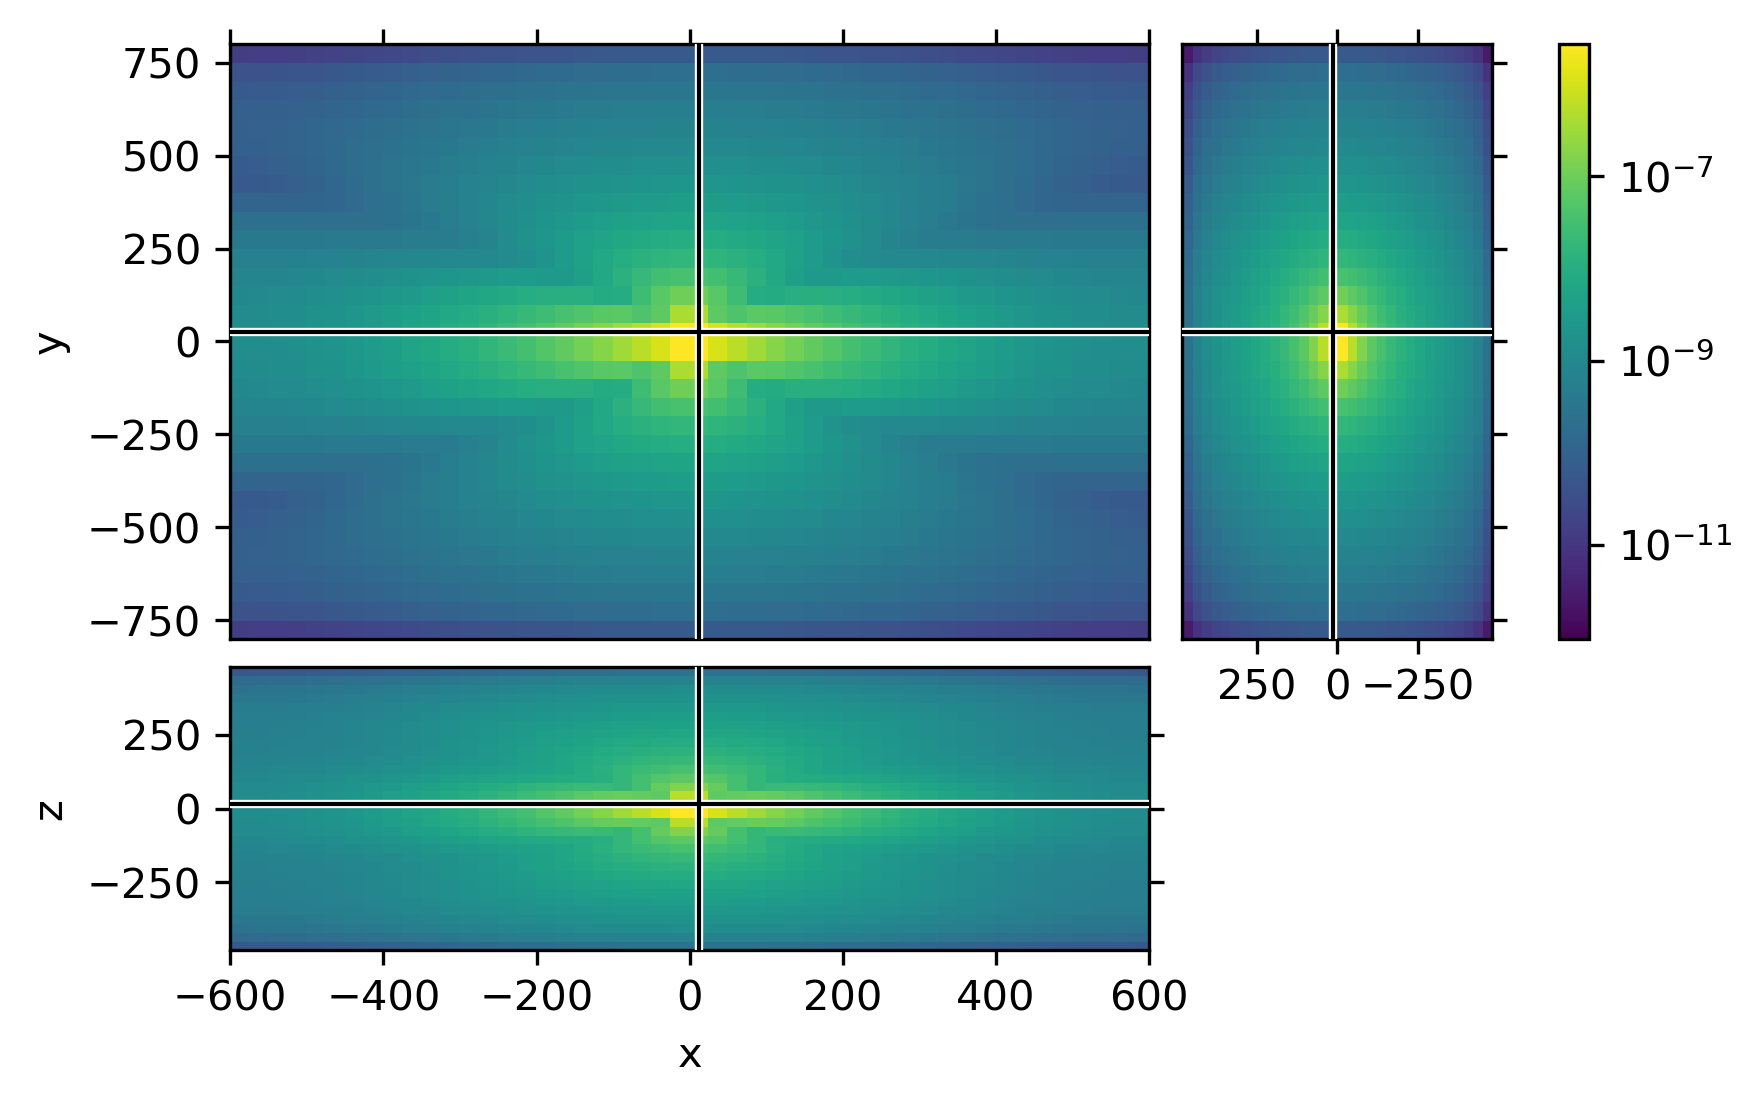

In [5]:
grid.plot_3d_slicer(
        efield.fx.ravel('F'), view='abs', vType='Ex',
        pcolorOpts={'norm': mpl.colors.LogNorm()})

In [6]:
emg3d.Report(discretize)

--------------------------------------------------------------------------------
  Date: Fri Nov 29 10:28:31 2019 CET

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

            0.4.10 : discretize
            1.17.3 : numpy
             1.3.1 : scipy
            0.46.0 : numba
0.9.2.dev1+gdf9766a.d20191125 : emg3d
             7.9.0 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------